<a href="https://colab.research.google.com/github/IgorESMelo/PLS_SKLEARN/blob/main/Partial_Least_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (2)

# Importando os dados do drive
Aqui é importante manter o arquivo em csv dentro da sua pasta MyDrive, caso contrário não funcionará. 

In [215]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
#df = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS_Train.csv', sep = ';')
df = pd.read_csv ('SPIRA_PLS_Train.csv', sep = ';')
uploaded = files.upload()
#df_test = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS_Test.csv', sep = ';')
df_test = pd.read_csv ('SPIRA_PLS_Test.csv', sep = ';')

# Limpando os dados
Os dados vieram com algumas sujeiras que serão retiradas aqui no pre-processamento

In [ ]:
df = df.dropna()
df = df.replace({',': '.'}, regex=True)
df_test = df.dropna()
df_test = df.replace({',': '.'}, regex=True)
df

# Dividindo Treino/Teste
Como todos os dados estão unidos, criaremos um vetor para Y e uma matrix para X

In [201]:
y_train = df['Y']
df.drop('Y', axis = 1, inplace = True)
X_train = df.copy()

# Criação do modelo inicial
Vamos criar um modelo inicial para o pls com os dados disponíveis

In [202]:
from sklearn.cross_decomposition import PLSRegression

# Define PLS object
pls = PLSRegression(n_components=2)

# Fit
pls.fit(X_train, y_train)

PLSRegression()

In [203]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
 
# Cross-validation
y_train_pred = cross_val_predict(pls, X_train, y_train, cv=100)
 
# Calculate scores
score = r2_score(y_train, y_train_pred)
rmse = (mean_squared_error(y_train, y_train_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.40383839804477095 
RMSE:  0.24077703933435152


In [204]:
# Calculando o erro
erro = float(0)
list_y_pred = list(y_train_pred)
list_y = list(y_train)

for i in range(len(y_train_pred)):
  value1 = float(list_y_pred[i])
  value2 = float(list_y[i])
  erro = erro + ((value1 - value2)**2)
erro = erro**(1/2)
erro

2.5022283925386413

# Testando para diferentes números de componentes principais

In [205]:
from sklearn.model_selection import GridSearchCV                                  # Import grid method

param_grid = [                                                                    # Defining parameters to grid method
    {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},                    # Defining the first set of parameters
]

grid_search = GridSearchCV( pls, param_grid, cv = 100,                            # Define grid search with randForest and 10 folds
                            scoring = 'neg_mean_squared_error',                   # Using MSE como parâmetro de erro
                            return_train_score = True)

grid_search.fit(X_train, y_train)                                                 # Running the tuning

GridSearchCV(cv=100, estimator=PLSRegression(),
             param_grid=[{'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [206]:
grid_search.best_params_      # Printing the best combination of parameters

{'n_components': 2}

In [207]:
# Printing the scores of all the combinations
RMSE = []
X = list(range(1,12+1))
cvres = grid_search.cv_results_                                             # Save all the results in a array
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):   # Getting the mean_score and parameters used from array
  #value = np.sqrt(-mean_score)
  RMSE.append(-mean_score)
  print(-mean_score, params)                                                # Printing the values

0.06500740626710554 {'n_components': 1}
0.06039678047239197 {'n_components': 2}
0.06150171707404304 {'n_components': 3}
0.0632389130216856 {'n_components': 4}
0.06476475910817142 {'n_components': 5}
0.0696427777768827 {'n_components': 6}
0.0794745871451006 {'n_components': 7}
0.08709403653356265 {'n_components': 8}
0.0953154241302121 {'n_components': 9}
0.10577701607596192 {'n_components': 10}
0.11136010818768999 {'n_components': 11}
0.11741424285086445 {'n_components': 12}


Text(0.5, 1.0, 'hp')

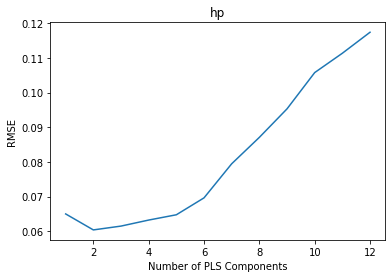

In [208]:
import matplotlib.pyplot as plt

#plot test RMSE vs. number of components
plt.plot(X, RMSE)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title('hp')

In [211]:
df_coef = pd.DataFrame(pls.coef_, columns = ['Coef'])
df_coef.sort_values(['Coef'], ascending = False)
print(df_coef['Coef'].tolist())

[-0.0008857282166098435, 0.006099043018297807, 0.005822741126906909, -0.0012643851425257213, 0.01226643402708853, 0.010682752762736288, -0.004445919633848733, 0.003351440705603807, 0.0025976150387005525, 0.002076791468070053, -0.009013924158619001, -0.0059157873885554435, 0.01602208372157257, -0.005959596983008144, 0.016117900428786226, -0.004470256358790255, -0.0012075631732297366, -0.001150164323134308, -0.0017051282738519606, 0.004513842834245137, 0.0027177720484957576, 0.0012138038637621114, 0.005400346629745712, 0.005214675943853041, -0.011878875832838438, -0.013248324123114824, -0.006594453914352562, 0.0032291847710051906, -0.0004031961993849523, -0.0007382635688343382, -0.013868563246951087, -0.015124459640616065, -0.0017552079542311305, 0.007949085964328246, 0.007798093484820093, -4.5974105308912046e-05, 0.0023533187746437776, -0.0028558648171577612, -0.0036055006995911465, 0.002657579203165673, 0.0075695452261784445, -0.008751182984185285, 0.0032742694021666513, -0.00251537945

In [ ]:
print(pls.get_params())

In [ ]:
import numpy as np

lista = [y_train_pred]
lista

# Rodando o modelo apenas com as variáveis mais importantes

In [217]:
# Vamos começar testando com as variáveis selecionadas
columns = ['x71', 'x72', 'x78', 'x77', 'x49', 'x15', 'x13', 'x32', 
           'x65', 'x75', 'x61', 'x31', 'x89', 'x26', 'x51', 'x52', 
           'x56', 'x86', 'x5', 'x84', 'x48', 'x25', 'x80', 'x76', 
           'x67', 'x50', 'x6']
X_test = df_test[columns].copy()
y_test = df_test['Y']
df_test.drop('Y', axis = 1, inplace = True)

In [218]:
# Define PLS object
pls = PLSRegression(n_components=2)

# Fit
pls.fit(X_test, y_test)

PLSRegression()

In [219]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=100)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.5370594357840086 
RMSE:  0.21217572173060412


In [220]:
# Testar com todas as variáveis
X_test = df_test.copy()

# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=100)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.40383839804477095 
RMSE:  0.24077703933435152


# Testando um código externo

In [ ]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
    #     # Trick to update status on the same line
    #     stdout.write("\r%d%% completed" % comp)
    #     stdout.flush()
    # stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    # stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

In [ ]:
optimise_pls_cv(X_train,y_train, 30, plot_components=True)

# (3) 

In [221]:
import pandas as pd

uploaded = files.upload()
df_completo = pd.read_csv ('SPIRA_PLS.csv', sep = ';')
#df_completo = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS.csv', sep = ';')
df_completo = df_completo.dropna()
df_completo = df_completo.replace({',': '.'}, regex=True)

In [234]:
# Testando 40/60
from sklearn.model_selection import train_test_split                                # Import the function by sklearn library

data_train, data_test = train_test_split(df_completo, test_size = 0.4, random_state = 42)   # Split the dataframe in train and test
print("The size of train set is: ", len(data_train))                                        # Printing the size of train set
print("The size of test set is:  ", len(data_test))                                         # Printing the size of test set

The size of train set is:  87
The size of test set is:   58


In [235]:
y_train = data_train['Y']
data_train.drop('Y', axis = 1, inplace = True)
X_train = data_train.copy()

In [236]:
y_test = data_test['Y']
data_test.drop('Y', axis = 1, inplace = True)
X_test = data_test.copy()

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=2)

# Fit
pls.fit(X_train, y_train)

In [228]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.5661755089136158 
RMSE:  0.2117534271651134


In [229]:
# Testando 10/90
from sklearn.model_selection import train_test_split                                # Import the function by sklearn library

data_train, data_test = train_test_split(df_completo, test_size = 0.1, random_state = 42)   # Split the dataframe in train and test
print("The size of train set is: ", len(data_train))                                        # Printing the size of train set
print("The size of test set is:  ", len(data_test))                                         # Printing the size of test set

The size of train set is:  130
The size of test set is:   15


In [230]:
y_train = data_train['Y']
data_train.drop('Y', axis = 1, inplace = True)
X_train = data_train.copy()

In [231]:
y_test = data_test['Y']
data_test.drop('Y', axis = 1, inplace = True)
X_test = data_test.copy()

In [232]:
# Define PLS object
pls = PLSRegression(n_components=2)

# Fit
pls.fit(X_train, y_train)

PLSRegression()

In [233]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.14386305586251003 
RMSE:  0.2433428818167236


# (4) Executando um modelo de regressão linear

In [237]:
# Vamos rodar de regressão para a porcao 60/40 (será necessário executar as células de atribuição das variáveis 60/40)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [238]:
# Cross-validation
y_test_pred = cross_val_predict(lin_reg, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  -0.30952047241889447 
RMSE:  0.3678998079933773
